# Example 12a: Using pressure outputs from the SALSA component and the SalsaContourPlot to perform an area of review analysis

This example demonstrates how to use the SALSA component (Semi-Analytical Leakage Solutions for Aquifers) and the SalsaContourPlot to perform an area of review analysis. Specifically, this example uses pressure outputs in a storage reservoir. The reservoir receives injection from four injection wells placed in a square formation, and an extraction well is placed in the center of the injection wells. There are three leaking wells near the site. One is located 100 m to the east of the extraction well, one is located 100 m to the east of the northeastern injection well, and one is located much further to the east (4 km to the east of the northeastern injection well). SALSA calculates  hydrualic head and pressure results in each aquifer and shale as well as the leakage through each leaking well. The SALSA component also calculates leakage across aquifer-aquitard interfaces, which is referred to as diffuse leakage. The example shown here is a modified version of control file example 64a.

Note that before this example can be run, one needs to have the OpenIAMEnv environment activated (environment containing the python libraries required to run NRAP-Open-IAM). For example, one can open Anaconda Prompt, use the command "conda activate OpenIAMEnv" to activate the environment (if it is named OpenIAMEnv), navigate to the directory for NRAP-Open-IAM, and then use the command "jupyter notebook" to open Jupyter Notebook from that directory and within that environment. Then, the jupyter notebook examples will have access to the Python libraries within NRAP-Open-IAM environment.

In this example, the user only needs to set up a SALSA component. While a standard NRAP-Open-IAM simulation will have separate reservoir, wellbore, and aquifer components, with each component providing and/or receiving inputs from another, SALSA does not connect with other components. The responses of reservoir(s), aquifers, aquitards, and leaking wells are all simulated by SALSA.

First, we review the different sections of the .yaml control file. Control files typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the hyphens are only there as a visual aid.

Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 150.0' and 'TimeStep: 10.0', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory').

Here, the analysis type is forward ('Analysis: forward'). This analysis type is deterministic, which means that the simulation output will be the same after each model run (as opposed to a stochastic simulation, where results vary).

Because only the SALSA component is required here, the 'Components' entry is given a list that only contains the name of the SALSA component ('Components: [SalsaComp]').

The 'Logging' input of 'Info' specifies that information about the status of the simulation will be displayed and saved to a file ('IAM_log.log').

Next, the control file must include a section for a stratigraphy component. While this section is required in a control file, the SALSA component does not connect with the NRAP-Open-IAM stratigraphy component. Instead, the stratigraphy information will  be handled internally through parameters given directly to the SALSA component. Even though the Stratigraphy component will not be used, certain parameters are provided here to prevent the simulation from printing warning statements saying that the parameters were not provided.

The input for the SALSA component is entered under the section title 'SalsaComp'. Because that section title is used, the SALSA component will be named 'SalsaComp'. The componnet type is specified with the entry 'Type: SALSA'. There are six other entries indented under the component name: 'InjectionWell', 'LeakingWell', 'OutputLocations', 'ContourPlot', 'Parameters', and 'Outputs'. Each of these subsections contain more inputs.

Certain inputs related to injection and extraction wells are entered under 'InjectionWell'. The x (easting) and y (northing) coordinates of these wells are given in meters with the inputs 'activeWellCoordx' and 'activeWellCoordy', respectively. In SALSA, injection and extraction rates are referred to as 'active wells'. Because there are four injection wells and one extraction well, five coordinates are given in lists (i.e., comma-separated values in brackets, '[x1, x2, x3, x4, x5]'). The entry 'periodEndTimes' specifies when the times at which injection / extraction rates change. Because there are two times given (75 and 150, in years), there are two injection periods. The first injection period has constant injection and extraction rates from 0 to 75 years. The second period has no injection or extraction from years 75 to 150; this time range can be considered the post-injection site care period.

The 'LeakingWell' section contains the locations of the leaking wells. The x and y coordinates are given as lists with the 'leakingWellCoordx' and 'leakingWellCoordy' entries.

The 'OutputLocations' section contains information regarding where hydraulic head and pressure outputs will be calculated. These outputs are calculated for aquifers at the x and y coordinates specified with 'aquiferCoordx' and 'aquiferCoordy'. The outputs are calculated for shales (aquitards) at the x and y coordinates specified with 'shaleCoordx' and 'shaleCoordy'.

The 'ContourPlot' section is used to specify the aquifers for which contour plot data will be saved. Because 'aquiferNamesContourPlots' is given as '[1]', the simulation will save gridded hydraulic head and pressure outputs only for aquifer 1. Unit numbers increase moving towards the surface, so aquifer 1 is deeper than aquifer 2, and aquifer 2 is deeper than aquifer 3. SALSA does not make any distinction between the aquifers used as storage reservoirs and other aquifers; any aquifer can be given injection or extraction rates. In this example, aquifer 1 is given injection and extraction rates (see the 'Parameters' section), so aquifer 1 is the targeted storage reservoir.

The 'Parameters' section is used to specify all other inputs for the SALSA component. The parameters 'bottomLayerType' and 'topLayerType' are used here to specify that the bottom and top layers will be shales (0 for shales, 1 for aquifers). The number of shale layers is given as 4 ('numberOfShaleLayers') - for SALSA, the number of aquifer layers is calculated as (numberOfShaleLayers + bottomLayerType + topLayerType - 1). Therefore, this example has three aquifers. Because bottomLayerType is 0 here, shale 1 is the deepest unit represented. Aquifer 1 is then on top of shale 1, and shale 2 is on top of aquifer 1. This pattern repeats until the highest unit, shale 4. Each unit is assigned a thickness, in meters (e.g., 'shale1Thickness: 43.0' or 'aquifer1Thickness: 72.0').

Each unit is assigned different characteristics, like vertical and horizontal hydraulic conductivities (e.g., 'shale1LogVertK' and 'aquifer1LogHorizK', in log$_{10}$ $m/s$), storativity ('shale1LogSS' and 'aquifer1LogSS', in log$_{10}$ $1/m$), pressurization rates ('shale1InitialGamma', 'shale1Gamma', 'aquifer1Gamma', in $1/s$). Each aquifer is also assigned a fluid density ('aquifer1FluidDensity', in $kg/m^3$) as well as an initial hydraulic head ('aquifer1Head', in $m$). SALSA is highly flexible, and allows the user to simulate injection and leakage across units that are under-pressured or over-pressured relative to a hydrostatic curve.

With the SALSA component, the parameters for a specific unit or feature can be given with an exact index (e.g., 'aquifer1Head: 10'). Alternatively, the word 'All' can be used instead of a specific number to set the parameters for all units or features of that type (e.g., 'aquiferAllGamma: 0' sets the pressurization rate for all aquifers to 0 $1/s$). Any inputs given with the 'All' index will be overwritten by more specific indexes. For example, so if the user provided 'aquiferAllHead: 0' but wanted to set the hydraulic head of aquifer 2 to a higher value, the input of 'aquifer2Head: 25' would still be applied to aquifer 2.

Other parameters are discussed further below.

Injection and extraction rates are given in $m^3/s$ with the parameter name format of 'activeWell#QAquifer#Period#'. Here, the well index ('activeWell#) refers to the position in the 'activeWellCoordx' and 'activeWellCoordy' lists (i.e., 'activeWell1' applies to the first entry in each comma-separated list).  The aquifer index refers to the injection or extraction rates for a specific aquifer (e.g., 'QAquifer1' applies to aquifer 1). The period index refers to the position in the 'periodEndTimes' input (e.g., 'Period1' for the first injection period, which ends at year 75 here). Therefore, the entry 'activeWell1QAquifer1Period1: -0.025' specifies that active well 1 (x = 0 $m$, y = 0 $m$) extracts from aquifer 1 at a rate of 0.025 $m^3/s$ during injection period 1. Conversely, the entry 'activeWell2QAquifer1Period1: 0.1' specifies that active well 2 (x = 1000 $m$, y = 1000 $m$) injects into aquifer 1 at a rate of 0.1 $m^3/s$ during injection period 1. Here, injection period 2 (years 75 to 150) has no injection or extraction.

The radii of all injection and extraction wells are specified as 0.1 meters with the input 'activeWellAllRadiusAquiferAll: 0.1'. Each active well ('activeWell#') could be assigned a different radius across each aquifer ('Aquifer#'), but this input uses 'All' to apply 0.1 $m$ to all active wells across all aquifers.

The parameters 'bottomBoundaryCond' and 'topBoundaryCond' are used to specify whether the bottom and top boundaries are fixed head (0) or no-flow boundaries (1), respectively. The bottom boundary is a fixed head boundary ('bottomBoundaryCond: 0') with a hydraulic head value of 0 $m$ ('bottomBoundaryHead: 0.0'). The top boundary is a no-flow boundary ('topBoundaryCond: 0'). If the top boundary was a fixed head boundary, it would use the hydraulic head given with the parameter name 'topBoundaryHead'.

The pressure ($Pa$) at the top boundary is given with the parameter name 'topBoundaryPressure'. Here, that pressure is set to 101,325 $Pa$, which is consistent with atmospheric pressure. The top boundary pressure could be elevated to a much higher value, however. By using this approach, the SALSA component could be used to depict an offshore geologic carbon storage site, with the top boundary pressure reflecting the combination of atmospheric pressure and pressure from the column of seawater.

The 'Parameters' section also contains inputs related to the leaking wells. For example, the hydraulic conductivity of each leaking well can be given in log$_{10}$ $m/s$ with the format of 'leakingWell#LogKAquifer#'. Here, the leaking well index ('leakingWell#') refers to the position in the 'leakingWellCoordx' and 'leakingWellCoordy' lists. The aquifer index ('LogKAquifer#') refers to each leaking well's hydraulic conductivity across a specific aquifer. For example, the hydraulic conductivity of all leaking wells across aquifer is given as 10$^{-5}$ $m/s$ with the input 'leakingWellAllLogKAquifer3: -5.0'. Similarly, the hydraulic conductivity of all leaking wells across shale 1 is given as 10$^{-4.5}$ $m/s$ with the input 'leakingWellAllLogKShale1: -4.5'.

The radii of all leaking wells across all aquifers is given as 0.1 $m$ with the input of 'leakingWellAllRadiusAquiferAll: 0.15'. The radii of all leaking wells across all shales is also specified as 0.15 $m$ with the input of 'leakingWellAllRadiusShaleAll: 0.15'.

The parameter name format 'leakingWell#StatAquifer#' is used to specify whether a leaking well is cased or screened across each aquifer (i.e., preventing or allowing leakage into that aquifer from that leaking well). Here, all leaking wells are screened across all aquifers ('leakingWellAllStatAquiferAll: 1', with 1 representing screened and 0 representing cased). Similarly, the status of each leaking well across each shale can be given with the parameter name format of 'leakingWell#StatShale#'. A value of 0 represents the well being plugged across the shale, while a value of 1 represents the well being unplugged across the shale. For example, the input 'leakingWellAllStatShale2: 1' makes all leaking wells unplugged across shale 2, allowing leakage to pass from aquifer 1 to aquifer 2.

A variety of other parameters are entered ('numberOfLaplaceTerms', 'flagMesh', 'xCent',  'yCent', 'xMax', 'yMax', 'gridExp', 'numberOfNodesXDir', 'numberOfNodesYDir', 'numberOfRadialGrids', 'radialZoneRadius', 'radialGridExp', 'numberOfVerticalPoints'). These parameters control different aspects of the SALSA component output; for more details, see the SALSA section of the NRAP-Open-IAM user guide.

The 'Outputs' section is used to define the types of results that will be saved during the simulation. There are many possible outputs for the SALSA component; for the sake of brevity, we will discuss only the outputs that will be displayed in figures at the end of this example.

As shown for parameter names, the SALSA outputs can also be given with the word 'All' in place of specific indices. For example, the entry 'wellLeakageVolumeAquiferAll' specifies that cumulative leakage volumes will be saved for each leaking well and each aquifer.

The entries 'diffuseLeakageVolumeBottomAquiferAll' and 'diffuseLeakageVolumeTopAquiferAll' specify that the simulation will save the cumulative leakage volumes across the bottom and top interface of each aquifer.

The pressure outputs at the bottom, middle, and top of each aquifer and at each aquifer output location are included with the output names 'pressureLocAllAquiferAll', 'pressureLocAllMidAquiferAll', and 'pressureLocAllTopAquiferAll', respectively.

Hydraulic head and pressure observations are calculated across the thickness of each shale, with the number of points across each shale specifieds with the 'numberOfVerticalPoints' parameter. The output name 'pressureProfileAllVertPointAllShaleAll' specifies that pressure outputs will be saved for all shale output locations ('shaleCoordx' and 'shaleCoordy') and all shales. One figure will show a vertical profile of pressure across the shales, and the output 'profileDepths' must also be included for that figure to be made.

Gridded pressure results can be saved for each aquifer included in the 'aquiferNamesContourPlots' entry. These gridded pressure results will be used to make map-view images highlighting where a critical pressure is exceeded in the storage reservoir (aquifer 1). The entries provided for these outputs are 'contourPlotTopAquiferPressure', 'contourPlotCoordx', 'contourPlotCoordy'.

Finally, there is a 'Plots' section. Each entry directly indented under 'Plots' is a separate plot entry. 

Two entries ('Diffuse_Leakage_Rates' and 'Leaking_Well_Leakage_Volumes') will be time series plots of results because the entry 'TimeSeries' is indented under each plot name. 'TimeSeries' is then followed by a list of the metrics to be displayed. The time series plot 'Diffuse_Leakage_Rates' will show diffuse leakage rates at the top aquifer-aquitard interface of each aquifer. The time series plot 'Leaking_Well_Leakage_Volumes' will show the cumulative leakage volumes from each leaking well into aquifers 2 and 3.

Each of the three remaining entries indented directly under 'Plots' ('Pressure_Profile', 'Pressure_Time_Series', and 'Pressure_Contour_Plot') use plot types that were developed specifically for output from a SALSA component. The entry directly under each plot name represents the plot type to be used ('SalsaProfile', 'SalsaTimeSeries', or 'SalsaContourPlot'). The entry 'MetricType: pressure' given under each plot type specifies that pressure outputs will be shown. These plot types can show either pressure or hydraulic head results (e.g., 'MetricType: head').

The plot entry 'Pressure_Profile' uses the 'SalsaProfile' plot type to vertical profiles of pressure at each shale output location ('shaleCoordx' and 'shaleCoordy').

The plot entry 'Pressure_Time_Series' uses the 'SalsaTimeSeries' plot type to create time series plots of pressure at each aquifer and shale output location ('aquiferCoordx', 'aquiferCoordy', 'shaleCoordx', and 'shaleCoordy').

Finally, the plot entry 'Pressure_Contour_Plot' uses the 'SalsaContourPlot' plot type to create map-view figures of pressure results in aquifer 1. The 'AquiferLocation' entry can be used to specify whether to show pressures at the bottom, middle, or top of each aquifer ('Bottom', 'Middle', or 'Top', respectively). The 'TimeList' entry is used to specify the times at which gridded results will be shown. 'TimeList' can either be given as 'All' (specifying all model times) or as a list of times in years (e.g., 'TimeList: [10, 20, 30]').

Under 'Pressure_Contour_Plot', the entry 'AoRAquiferNumber' specifies the aquifer for which critical pressure will be calculated. Note that this aquifer is generally meant to be the lowest underground source of drinking water (USDW); if an aquifer contains potable water (total dissolved solids of less than 10,000 $mg/L$), then it must be protected from leakage. Because 'AoRAquiferNumber' is given as 3, aquifer 3 will be considered as the USDW in the area of review analysis. Therefore, the critical pressure calculated will be the pressure required to raise fluid from the reservoir (aquifer 1) to the base of aquifer 3.

The entry 'CriticalPressureMPa: Calculated' specifies that the critical pressure will be automatically calculated. When calculating critical pressure automatically, the approach used assumes a hydrostatic pressure in the USDW (here, aquifer 3). If the user wants to use a different approach (e.g., treating aquifer 3 as under-pressured or over-pressured), then the 'CriticalPressureMPa' input can be given as a specific pressure in $MPa$ (e.g., 'CriticalPressureMPa: 9.75' for 9.75 $MPa$). For more information, see the section for the critical pressure equation in the user guide of NRAP-Open-IAM.

The code below will run the simulation. Note that this simulation take some time to run (e.g., about five minutes). The output will be saved to a folder called 'output_ex64a_jupyter' in the 'output' folder of the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed').

After the main simulation is complete, NRAP-Open-IAM will continue to create figures. The figures will be placed in the 'output_64a_jupyter' folder in the output directory of the NRAP-Open-IAM installation. Once the figure creation has finished, the code below will print the statement 'Finished'. 

In [1]:
import sys
import os
from datetime import datetime

# Add the source folder to the path
sys.path.insert(0, os.sep.join(['..', '..', 'src']))

# Name of the control file
file_name = 'ControlFile_ex64a_jupyter.yaml'

file_path = os.path.join(os.getcwd(), '..', 'Control_Files', 
                         'examples_for_jupyter_notebook', file_name)

source_dir = os.path.join(os.getcwd(), '..', '..', 'src')

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'components', 'openiam_cf.py')

# Set up the command to run the control file. The command has the format 
# 'python /path/to/openiam_cf.py --file ControlFile_ex58e_jupyter.yaml'.
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_path)

In [2]:
print('Running Control File example 64a...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 64a...



INFO     
NRAP-Open-IAM version: beta_1.1.0-24.07.30
Runtime: 2024-08-07_13.47.27 

INFO     
Running file C:\UserDATA\NRAP\NRAP_Open_IAM\Pip_NRAP_Open_IAM_Dev\examples\Jupyter_notebooks\..\Control_Files\examples_for_jupyter_notebook\ControlFile_ex64a_jupyter.yaml

INFO     
Analysis completed at 2024-08-07_13.48.09.
Total run time: 0:00:42.410422 

INFO     
Simulation results and plots can be found in the output folder: 
C:\UserDATA\NRAP\NRAP_Open_IAM\Pip_NRAP_Open_IAM_Dev\output/output_ex64a_jupyter


Finished.


The simulation will create many figures. You can check the output folder ('output_ex64a_jupyter') to see when the figures are produced. If the figures have been produced, the code below loads nine of the figures. Otherwise, it will print a statement saying that the figure could not be found.

The figure 'Leaking_Well_Leakage_Volumes.png' shows the leakage volumes from all leaking wells into aquifers 2 and 3. A positive leakage volume represents fluid entering the aquifer from the leaking well, while a negative leakage volume represents fluid entering the leaking well from the aquifer. For example, while the well leakage volumes for aquifer 1 are not shown here, those volumes would be negative because fluid is leaving aquifer 1 (the reservoir).

The figure 'Diffuse_Leakage_Rates.png' shows the leakage rates across the aquifer-aquitard interfaces ("diffuse leakage") at the top of each aquifer.

The figures 'Aquifer_Pressure_Time_Series_Loc_1.png' and 'Shale_Pressure_Time_Series_Profile_2.png' are time series plots of aquifer and shale pressures over time, respectively. Each unit's results are shown in a separage subplot, and each line is color-labelled by its depth. There are three lines for each aquifer representing the pressure at the bottom, middle, and top of the aquifer. There are 10 lines for each shale, representing each of the points specified with the parameter entry 'numberOfVerticalPoints: 10'. The points extend from the bottom to the top of each shale.

The figure 'Shales_Vertical_Pressure_Profile_2.png' is a vertical profile of pressures across all of the shale units at the second coordinates entered with 'shaleCoordx' and 'shaleCoordy' under 'OutputLocations' (x = 1100 m, y = 1000 m). Pressure results are color-labelled by time, with red being at earlier model times and blue being at later model times. A dashed black line is used to show hydrostatic pressures calculated with a fixed fluid density of 1000 $kg/m^3$.

The remaining figures shown here ('SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_1.png', 'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_3.png', 
'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_7.png', and 'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_8.png') are map-view images showing gridded pressure results at the top of aquifer 1 (the reservoir). These figures show results at times of 10, 30, 70, and 80 years. Because the plot entry specified that the area of review analysis would focus on aquifer 3 as the USDW, the critical pressure shown was calcualted as the pressure required to raise brine from the top of aquifer 1 to the base of aquifer 3. The areas where the critical pressure is exceeded are highlighted with a purple line. These areas could be considered when delineating the area of review for this hypothetical geologic carbon storage site.

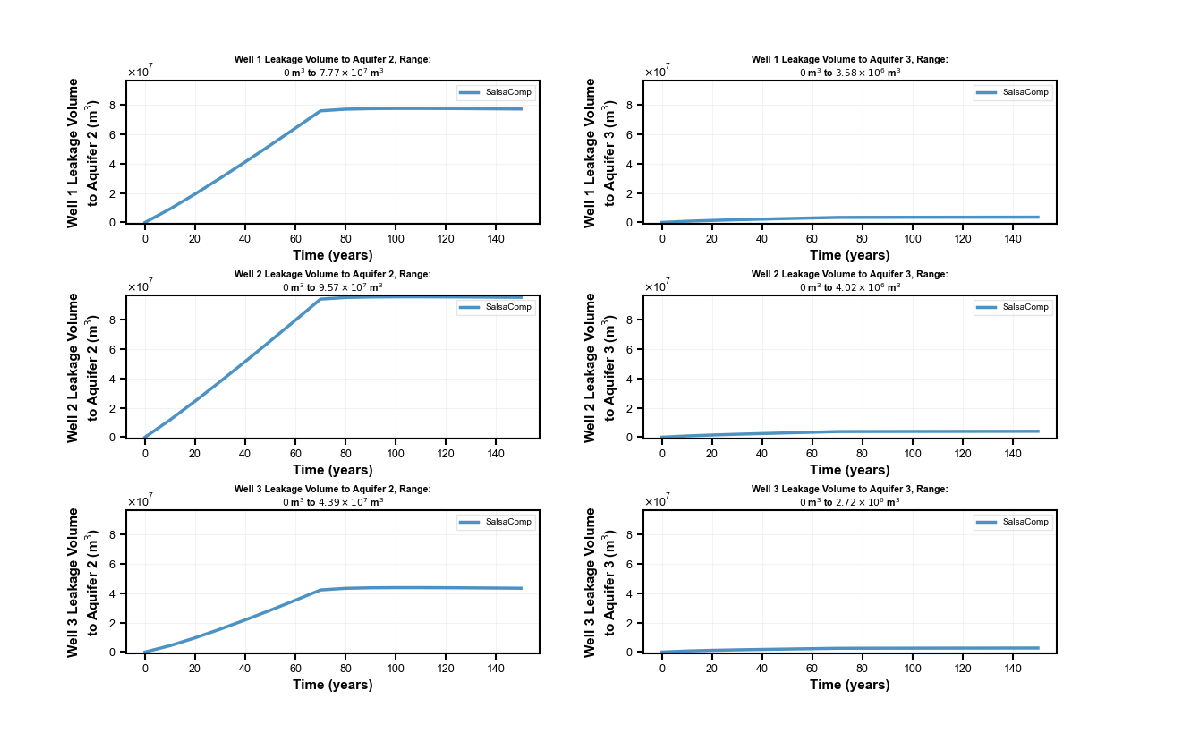

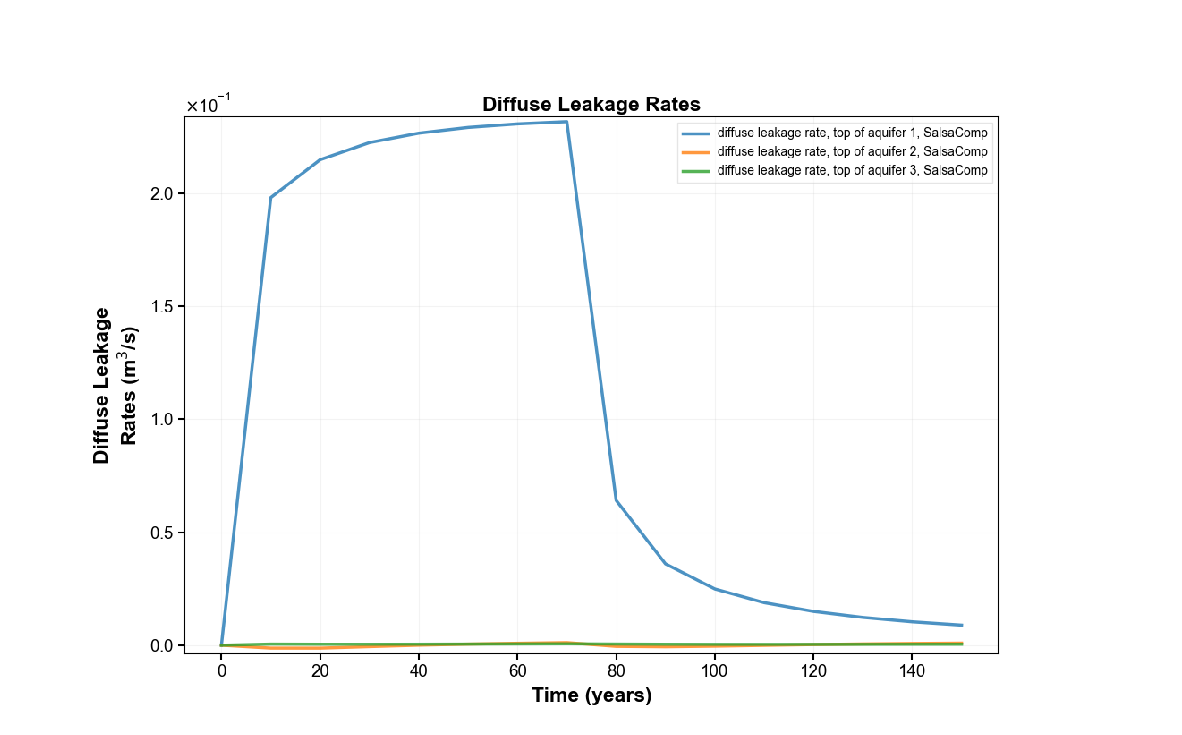

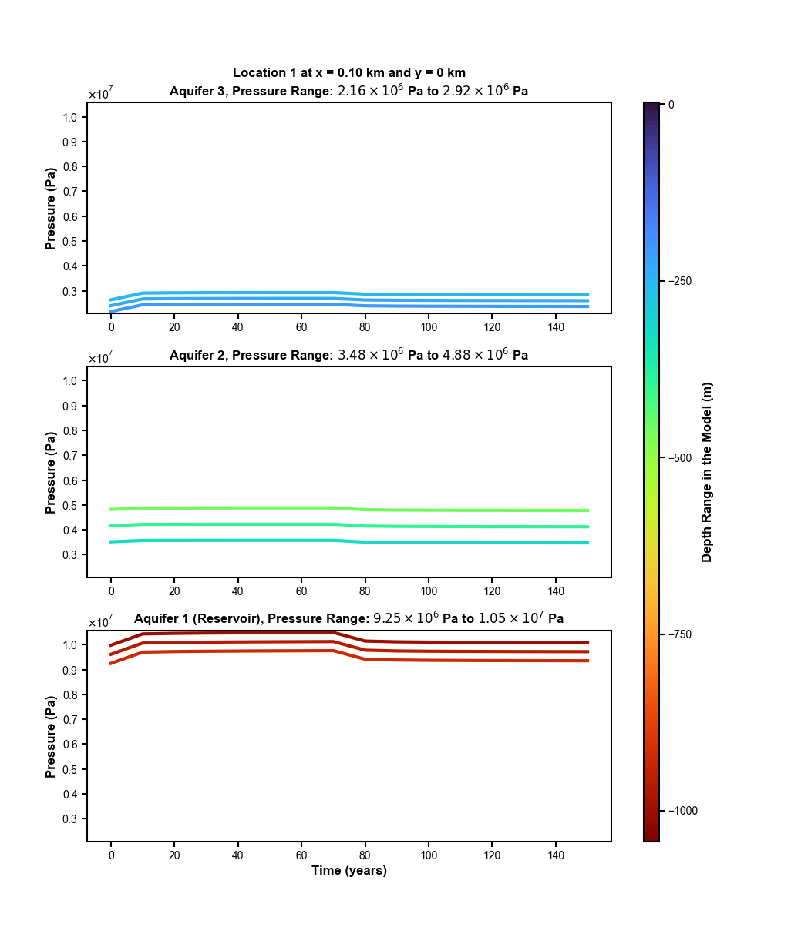

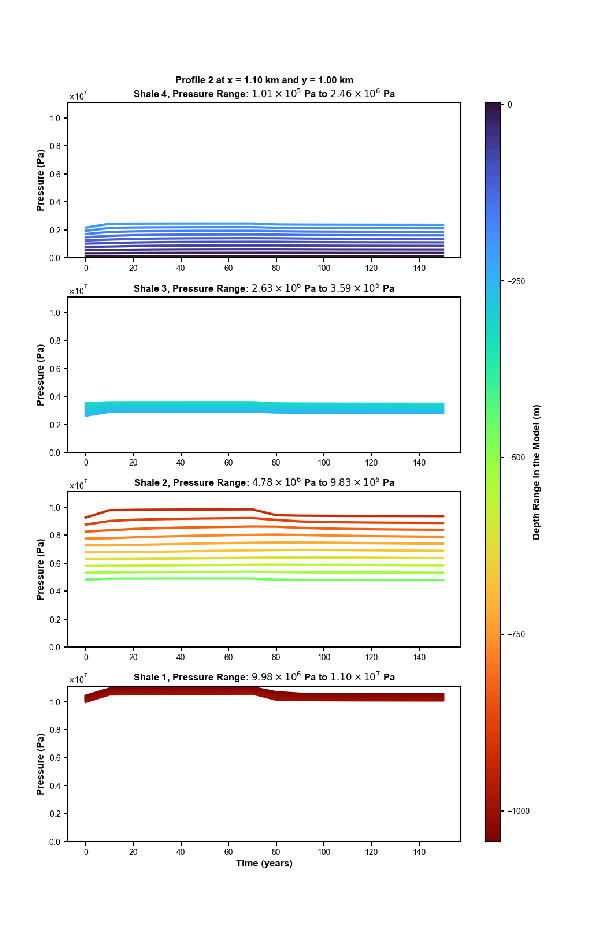

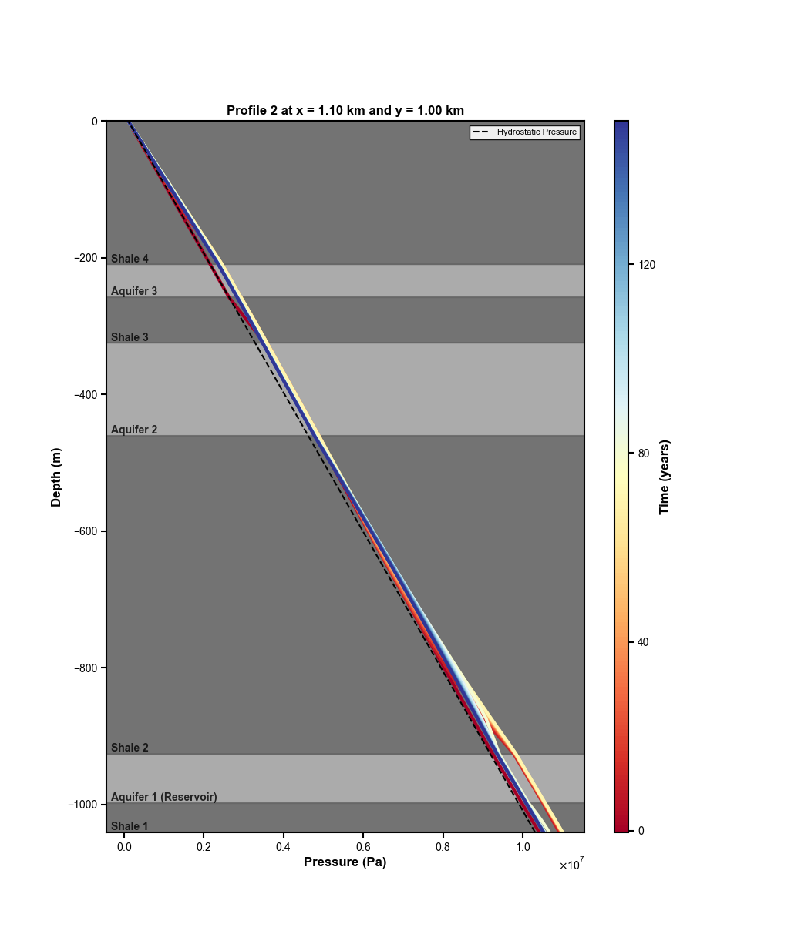

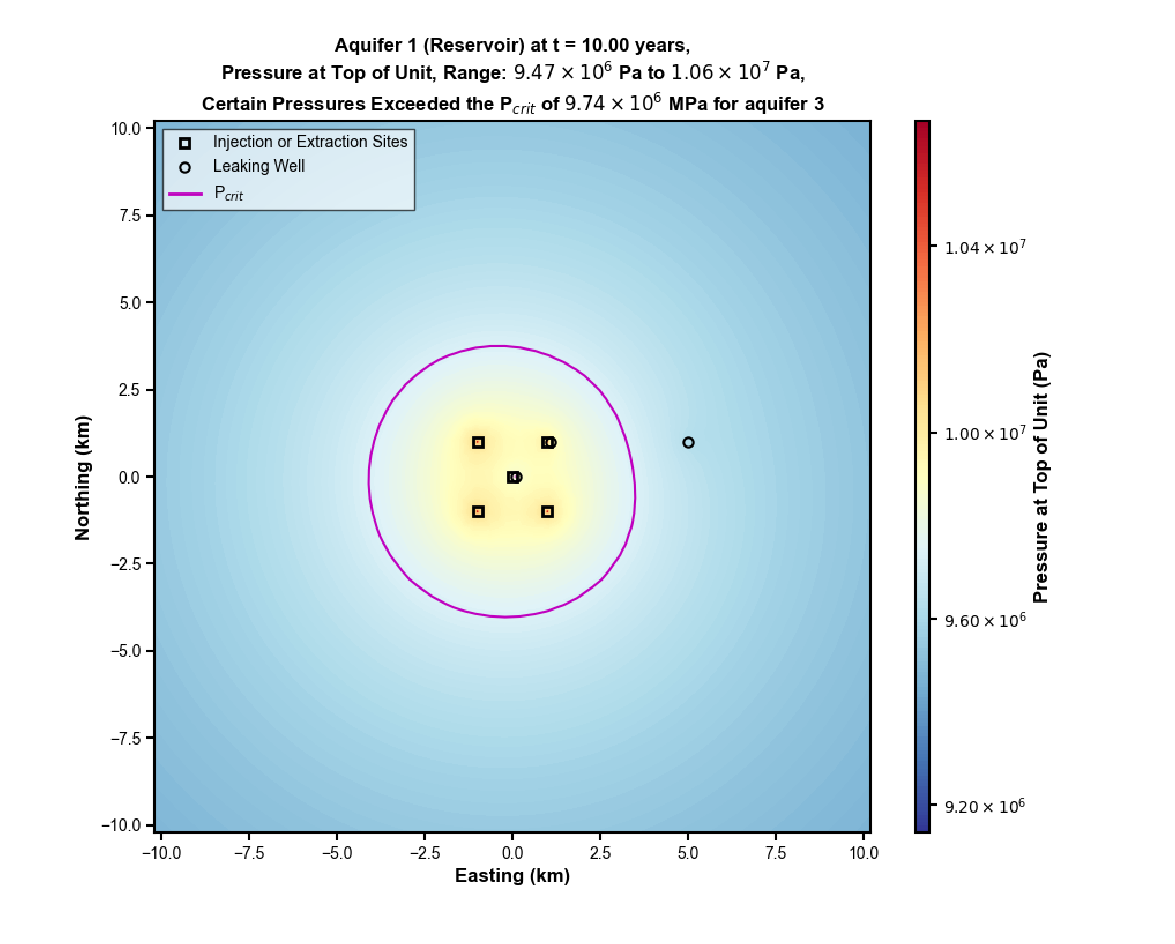

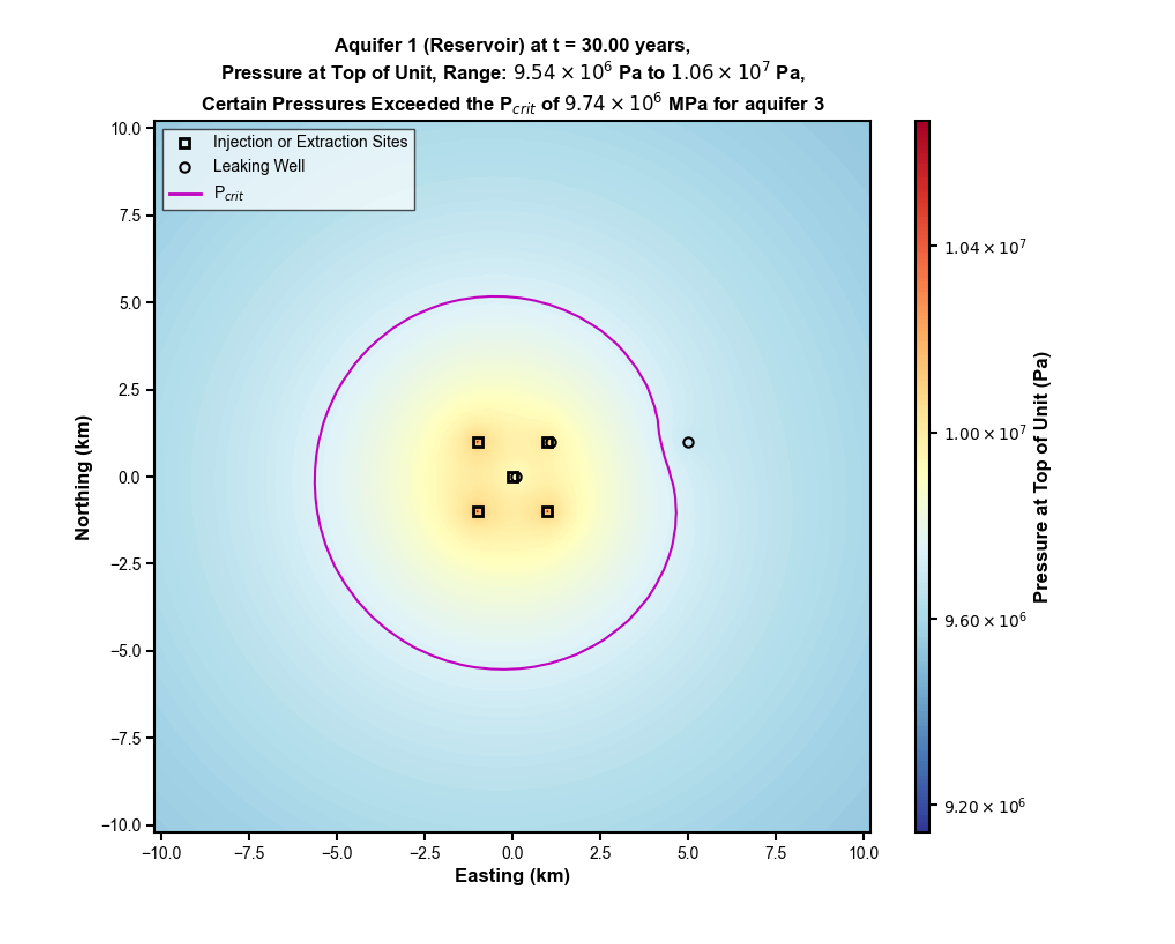

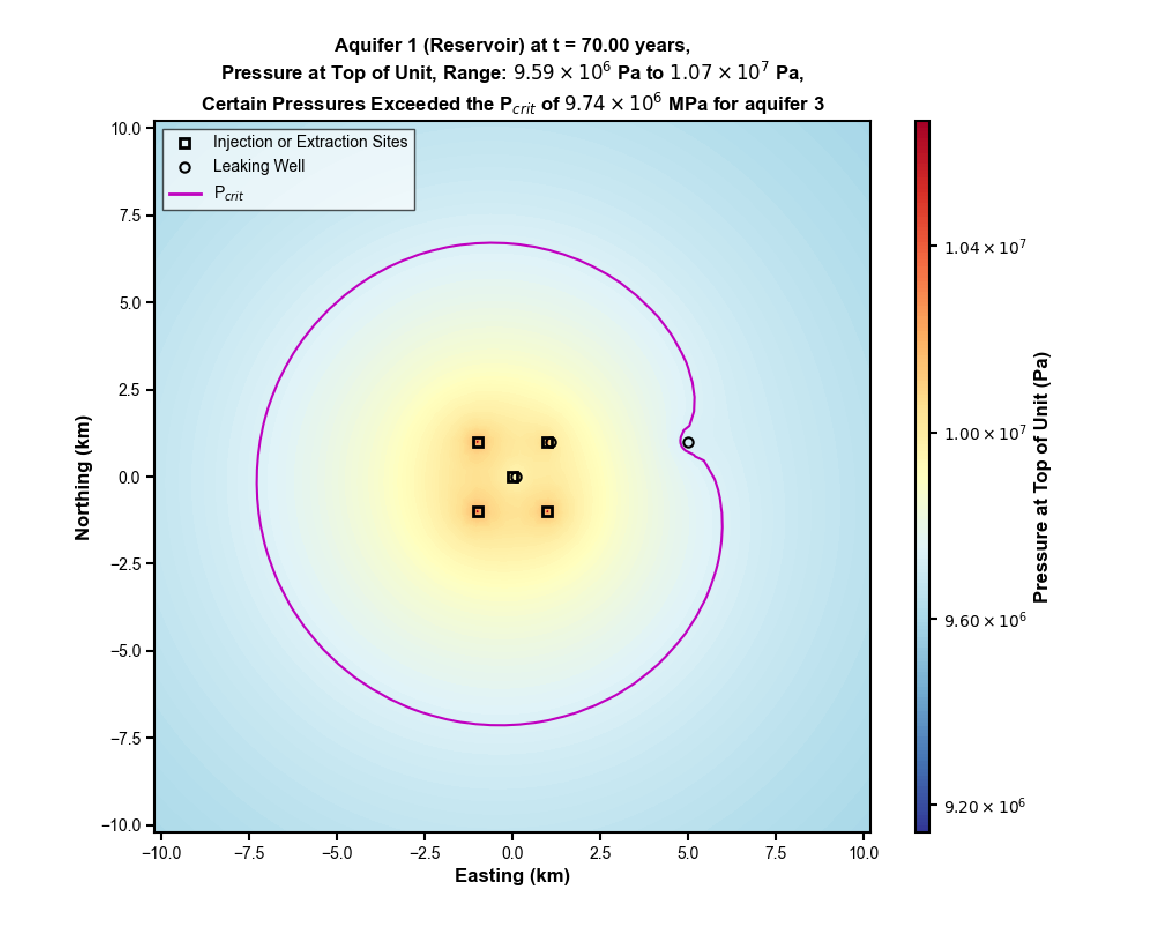

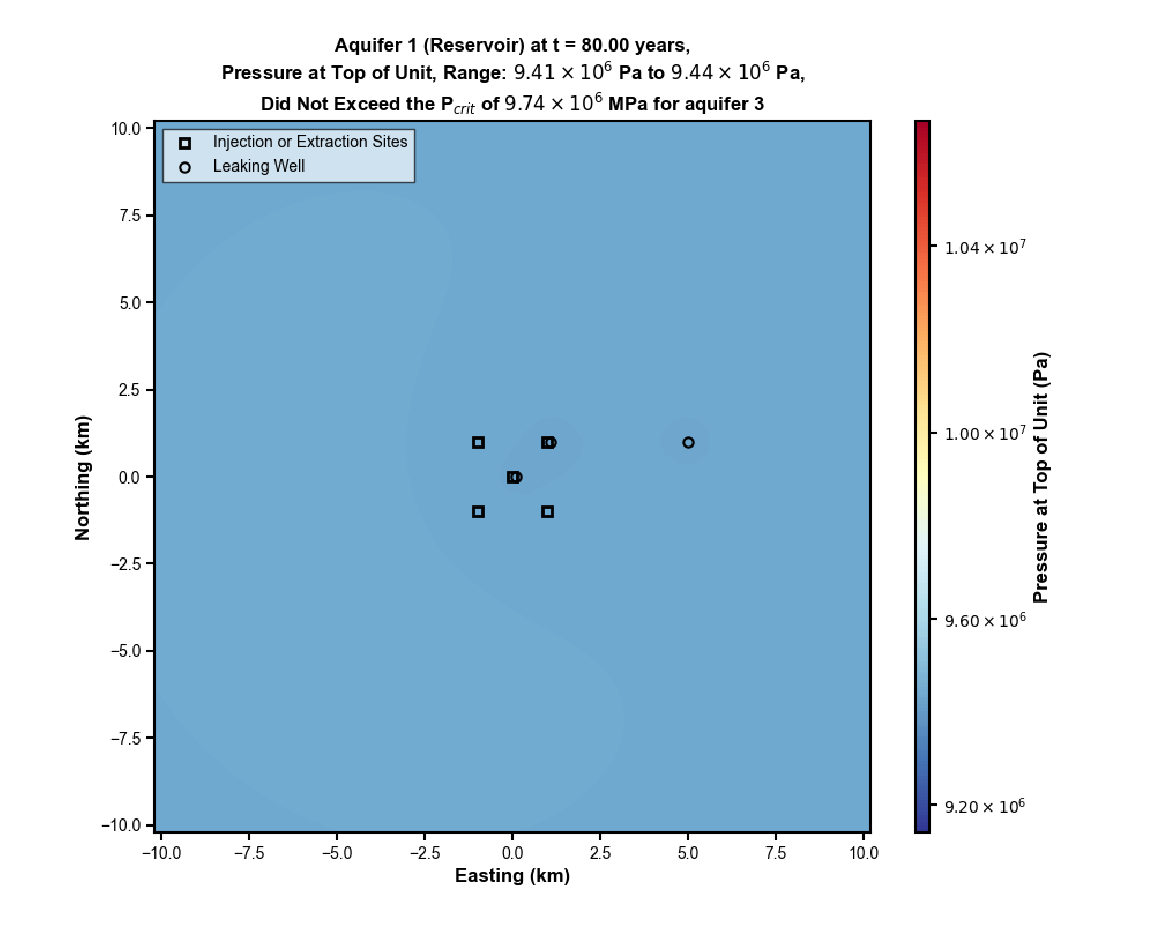

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Leaking_Well_Leakage_Volumes.png', 
                'Diffuse_Leakage_Rates.png', 
                'Aquifer_Pressure_Time_Series_Loc_1.png', 
                'Shale_Pressure_Time_Series_Profile_2.png', 
                'Shales_Vertical_Pressure_Profile_2.png', 
                'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_1.png', 
                'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_3.png', 
                'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_7.png', 
                'SalsaContourPlot_Top_Pressure_Aquifer_1_tIndex_8.png'
               ]

example_output_directory = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex64a_jupyter')

for figRef in range(len(figure_names)):
    file_path = os.path.join(example_output_directory, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=100)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()

This example does not show all of the figures created by the simulation; to see all of the figures, go to the directory /output/output_ex64a_jupyter (where the output folder is in the main directory of the NRAP-Open-IAM installation). Furthermore, all results are saved to .csv files in the directory /output/output_ex64a_jupyter/csv_files.

Overall, the SALSA component is highly flexible and useful for many analyses related to geolgic carbon storage site planning and operation.